<h1>Импорт библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [11]:
def sum_prod(X, V):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    summa = 0
    X = np.array(X)
    V = np.array(V)
    return np.sum(X @ V)


def tests():
    X = [[1, 2], [3, 4]]
    V = [[1], [1]]
    assert sum_prod(X, V) == 10 

    X = [[1, 0], [0, 1]]
    V = [[2], [3]]
    assert sum_prod(X, V) == 5 

    X = [[-1, 2], [3, -4]]
    V = [[1], [-1]]
    assert sum_prod(X, V) == 4 

    X = [[5]]
    V = [[2]]
    assert sum_prod(X, V) == 10

    print("Tests passed")

tests()

Tests passed


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [30]:
def binarize(M, threshold=0.5):
    M = np.asarray(M)
    return (M > threshold).astype(np.int64)

def tests():
    assert np.array_equal(binarize([1, 2, 3], 2), [0, 0, 1])

    assert np.array_equal(binarize([[0.4, 0.6], [0.5, 0.9]]), 
                         np.array([[0, 1], [0, 1]]))
    
    assert np.array_equal(binarize([-2, -1, 0], -1), np.array([0, 0, 1]))

    assert np.array_equal(binarize([0.49, 0.50, 0.51]), np.array([0, 0, 1]))
    print("Tests passed")

tests()

Tests passed


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [34]:
def unique_rows(mat):
    return [np.unique(row) for row in np.asarray(mat)]

def unique_columns(mat):
    return [np.unique(row) for row in np.asarray(mat).T]

def test_unique_rows():
    mat1 = [[1, 2, 2], 
            [3, 3, 3], 
            [4, 5, 5]]
    assert [arr.tolist() for arr in unique_rows(mat1)] == [[1, 2], [3], [4, 5]]
    
    assert unique_rows([]) == []
    
    mat3 = [[1, 2], [3, 4]]
    assert [arr.tolist() for arr in unique_rows(mat3)] == [[1, 2], [3, 4]]
    
    mat4 = [[1, 1, 2, 2, 3]]
    assert [arr.tolist() for arr in unique_rows(mat4)] == [[1, 2, 3]]

def test_unique_columns():
    mat1 = [[1, 2, 3], 
            [1, 2, 3], 
            [4, 2, 3]]
    assert [arr.tolist() for arr in unique_columns(mat1)] == [[1, 4], [2], [3]]
    
    assert unique_columns([]) == []
    
    mat3 = [[1, 2], [3, 4]]
    assert [arr.tolist() for arr in unique_columns(mat3)] == [[1, 3], [2, 4]]
    
    mat4 = [[1], [1], [2]]
    assert [arr.tolist() for arr in unique_columns(mat4)] == [[1, 2]]

def run_tests():
    test_unique_rows()
    test_unique_columns()
    print("Tests passed")

run_tests()

Tests passed


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

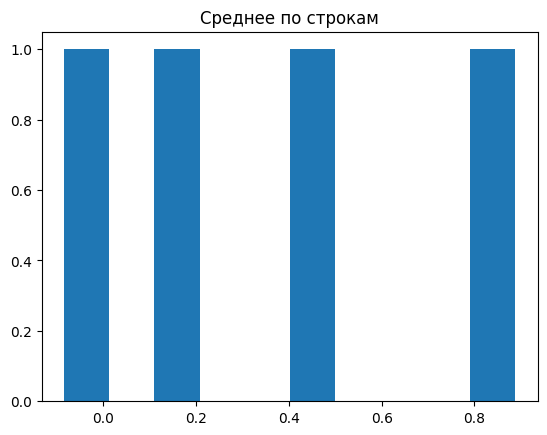

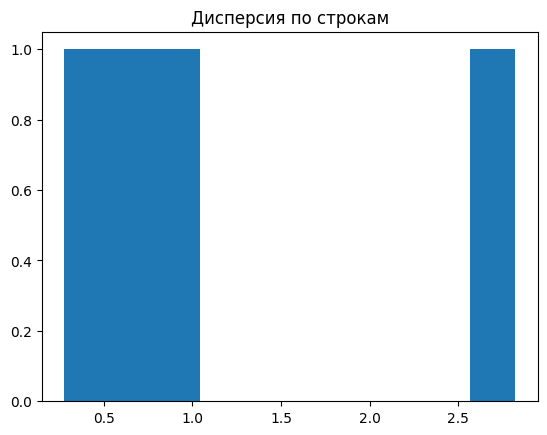

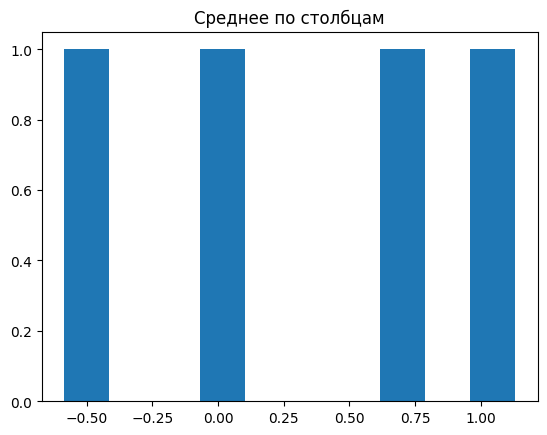

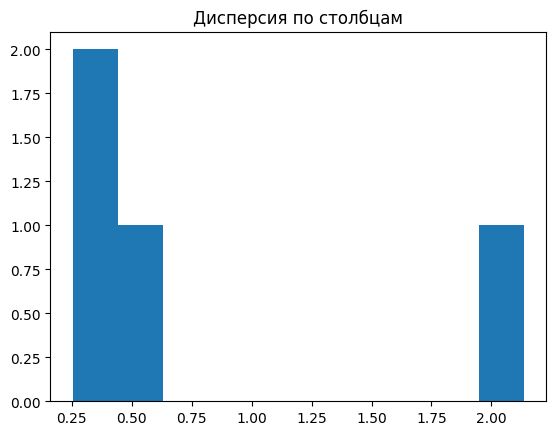

In [51]:
def rand_normal(m,n):
    mtx = np.random.normal(size=(m, n))
    out_mean_row = [np.mean(row) for row in mtx]
    out_var_row = [np.var(row) for row in mtx]
    
    out_mean_col = [np.mean(col) for col in mtx.T]
    out_var_col = [np.var(col) for col in mtx.T]
    
    return [out_mean_row, out_var_row, out_mean_col, out_var_col]


def create_gist(array, title):
    plt.figure()
    plt.hist(array)
    plt.title(title)
    plt.show()

def task(m, n):
    titles = ["Среднее по строкам", "Дисперсия по строкам", 
          "Среднее по столбцам", "Дисперсия по столбцам"]
    stats = rand_normal(m, n)
    for array, title in zip(stats, titles):
        create_gist(array, title)

task(4,4)

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [72]:
def chess(m, n, a, b):
    matrix = np.full((m, n), a)
    matrix[1::2, ::2] = b
    matrix[::2, 1::2] = b
    return matrix

def tests():
    assert np.array_equal(chess(3, 3, "A", "B"), np.array([['A', 'B', 'A'],['B', 'A', 'B'],['A', 'B', 'A']]))

    assert np.array_equal(chess(2, 2, 0, 1), 
                       np.array([[0, 1],
                                [1, 0]]))
    
    assert np.array_equal(chess(4, 4, -1, 1), 
                       np.array([[-1,  1, -1,  1],
                                [ 1, -1,  1, -1],
                                [-1,  1, -1,  1],
                                [ 1, -1,  1, -1]]))
    
    print("Tests passed")

tests()
    

Tests passed


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

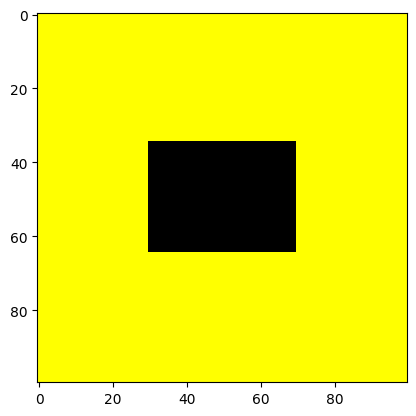

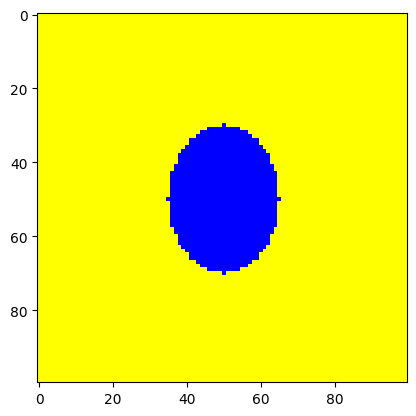

In [101]:
def draw_rectangle(image, m, n, a, b, bg_color, color):
    image[:,:] = bg_color
    image[len(image[0]) // 2 - a:len(image[0]) // 2 + a, len(image[1]) // 2 - b:len(image[1]) // 2 + b] = color

def draw_ellipse(image, m, n, a, b, bg_color, color):
    image[:,:] = bg_color
    y, x = np.ogrid[:m, :n]
    mask = ((x - n // 2) ** 2 / a ** 2 + (y - m // 2) ** 2 / b ** 2) <= 1
    image[mask] = color

m, n = 100, 100
image = np.zeros((m, n, 3), dtype=np.uint8)
bg_color = (255, 255, 0)
rect_color = (0, 0, 0)
ellipse_color = (0, 0, 255)

draw_rectangle(image, m, n, 15, 20, bg_color, rect_color)
plt.imshow(image)
plt.show()

draw_ellipse(image, m, n, 15, 20, bg_color, ellipse_color)
plt.imshow(image)
plt.show()

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [102]:
def analyze(ts, p):

    mean = np.mean(ts)
    var = np.var(ts)
    std = np.std(ts)

    localMin = []
    localMax = []
    for i in range(1, len(ts) - 1):
        if  ts[i - 1] > ts[i] and ts[i] < ts[i + 1]:
            localMin.append(ts[i])
        if ts[i - 1] < ts[i] and ts[i] > ts[i + 1]:
            localMax.append(ts[i])

    smoothedSeries = np.convolve(ts, np.ones(p), mode='valid') / p

    return mean, var, std, localMax, localMin, smoothedSeries

ts = np.array([1,2,3,4,3,2,5,6,8,3])
print(f"ts: {ts}")

mean, var, std, localMax, localMin, smoothedSeries = analyze(ts, 4)

print(f"Мат.ожидание: {mean}")
print(f"Дисперсия: {var}")
print(f"СКО: {std}")
print(f"Локальные максимумы:: {localMax}")
print(f"Локальные минимумы: {localMin}")
print(f"Метод скользящего среднего: {smoothedSeries}")

ts: [1 2 3 4 3 2 5 6 8 3]
Мат.ожидание: 3.7
Дисперсия: 4.01
СКО: 2.0024984394500787
Локальные максимумы:: [np.int64(4), np.int64(8)]
Локальные минимумы: [np.int64(2)]
Метод скользящего среднего: [2.5  3.   3.   3.5  4.   5.25 5.5 ]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [108]:
def one_hot_encoding(labels):
    return np.eye(len(labels), dtype=int)[labels]

print(one_hot_encoding([0,2,3,0]))
print(one_hot_encoding([1, 0, 2, 1, 3]))

[[1 0 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]]
[[0 1 0 0 0]
 [1 0 0 0 0]
 [0 0 1 0 0]
 [0 1 0 0 0]
 [0 0 0 1 0]]
